# Lab 2
DD2423 Image Analysis and Computer Vision 

## Exercise 1

In [60]:
import numpy as np
#from numpy.fft import fft2, ifft2, fftshift
from scipy.signal import convolve2d, correlate2d
import matplotlib.pyplot as plt

from Functions import *
from gaussfft import gaussfft

In [61]:
def deltax():
        #dxmask = np.array([[0.5, 0, -0.5]])
        dxmask = np.array([[0, 0, 0], [0.5, 0, -0.5], [0, 0, 0]]) # This version ensures both dxtools and dytools have the same size
        return dxmask

def deltay():
        # ....
        #dymask = np.array([[0.5], [0], [-0.5]])
        dymask = np.array([[0, 0.5, 0], [0, 0, 0], [0, -0.5, 0]])
        return dymask

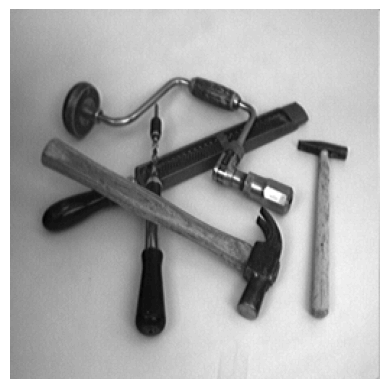

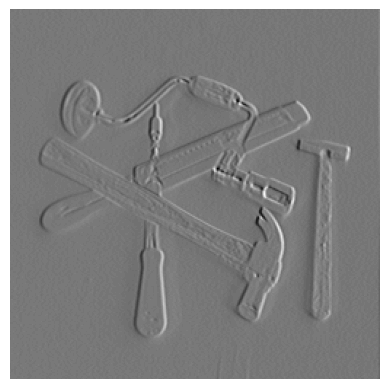

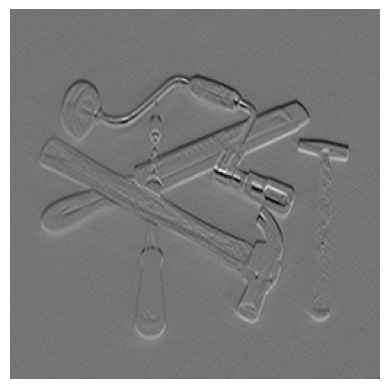

(h, w): (256, 256) (254, 254) (254, 254)


In [62]:
tools = np.load("Images-npy/few256.npy")
dxtools = convolve2d(tools, deltax(), 'valid')
dytools = convolve2d(tools, deltay(), 'valid')

showgrey(tools)
showgrey(dxtools)
showgrey(dytools)

print("(h, w):", tools.shape, dxtools.shape, dytools.shape)

## Exercise 2

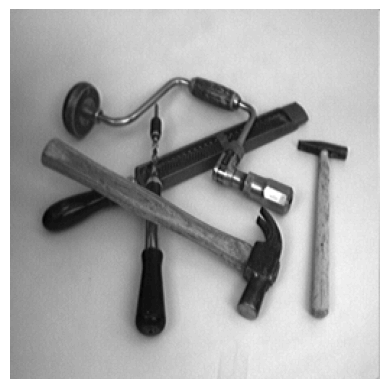

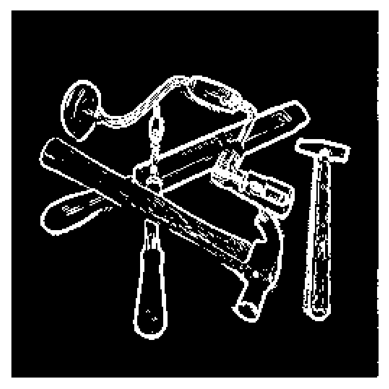

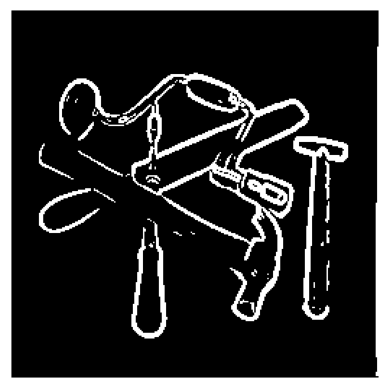

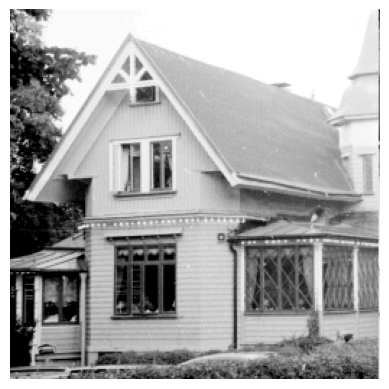

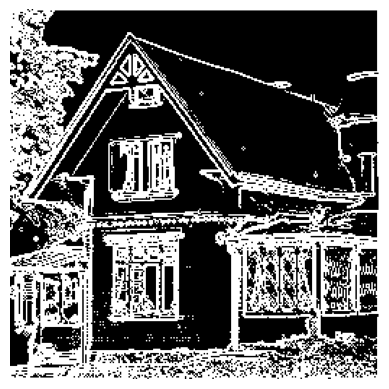

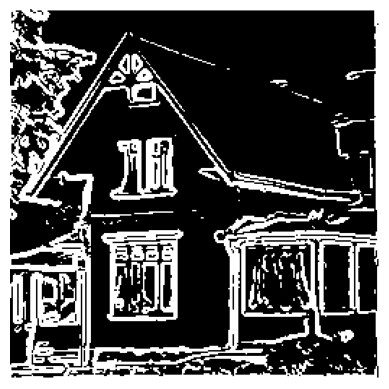

In [76]:
# Lv returns the gradient magnitude in every point of the image. 
# If a nonzero parameter t is provided, the image is filtered with gaussian of variance t
def Lv(inpic, t = 0, shape = 'same'):
    if t:
        inpic = gaussfft(inpic, t)
    Lx = convolve2d(inpic, deltax(), shape)
    Ly = convolve2d(inpic, deltay(), shape)
    return np.sqrt(Lx**2 + Ly**2)
    
threshold = 15
blur_threshold = 15

tools = np.load("Images-npy/few256.npy")
showgrey(tools)
showgrey((Lv(tools) > threshold).astype(int))
showgrey((Lv(tools, t=1.0) > blur_threshold).astype(int))

godthem = np.load("Images-npy/godthem256.npy")
showgrey(godthem)
showgrey((Lv(godthem) > threshold).astype(int))
showgrey((Lv(godthem, t=1.0) > blur_threshold).astype(int)) # Gaussian blur applied prior to gradient calculation



## Exercise 4

In [97]:
def dxmask():
    dx = np.zeros([5, 5])
    dx[2, 1] = 0.5
    dx[2, 3] = -0.5
    return dx

def dymask():
    dy = np.zeros([5, 5])
    dy[1, 2] = 0.5
    dy[3, 2] = -0.5
    return dy

def dxxmask():
    dxx = np.zeros([5, 5])
    dxx[2, 1] = 1
    dxx[2, 2] = -2
    dxx[2, 3] = 1
    return dxx

def dyymask():
    dyy = np.zeros([5, 5])
    dyy[1, 2] = 1
    dyy[2, 2] = -2
    dyy[3, 2] = 1
    return dyy

def dxymask():
    return convolve2d(dxmask(), dymask(), 'same')

def dxxxmask():
    return convolve2d(dxmask(), dxxmask(), 'same')

def dxxymask():
    return convolve2d(dxxmask(), dymask(), 'same')

def dxxymask2():
    return convolve2d(dxmask(), dxymask(), 'same')

def dxyymask():
    return convolve2d(dxmask(), dyymask(), 'same')

def dyyymask():
    return convolve2d(dymask(), dyymask(), 'same')

def Lvvtilde(inpic, t = 0, shape = 'same'):
    return 0

def Lvvvtilde(inpic, t = 0, shape = 'same'):
    return 0

[x, y] = np.meshgrid(range(-5, 6), range(-5, 6))
# print(convolve2d(x**3, dxxxmask(), 'valid'))      # dxxx(x^3) = 6
# print(convolve2d(x**3, dxxmask(), 'valid'))       # dxx(x^3) = 6x
# print(convolve2d(x**2*y, dxxymask(), 'valid'))    # dxxy(x^2 * y) = 2
# print(convolve2d(x*y**2, dxxmask(), 'valid'))     # dxx(x*y^2) = 0


[[6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6.]]
[[-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]]
[[2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


# Exercise 5